# **The Sparks Foundation**

> ## **Computer Vision and Internet of Things Internship**

 **Name: Oloyede Opeyemi Iremide**

**December 2023 Intern**

**Email: stephrex602@gmail.com**

**Task: Implement an object detector which identifies the classes of the objects in an image or video**

In [243]:
#Importing required modules
import cv2
import numpy as np

In [254]:
# Setting up model
config_path = 'Model/gist.githubusercontent.com_mm-aditya_797a3e7ee041ef88cd4d9e293eaacf9f_raw_3d2765b625f1b090669a05d0b3e79b2907677e86_MobileNetSSD_deploy.prototxt.txt'
weight_path = 'Model/MobileNetSSD_deploy.caffemodel'

In [255]:
# Getting the class names
class_names = ["background", "aeroplane", "bicycle", "bird", "boat",
               "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
               "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
               "sofa", "train", "tvmonitor"]

In [256]:
# Instantiating the model using OpenCV
model = cv2.dnn.readNetFromCaffe(config_path, weight_path)

In [257]:
# Function to predict from webcam
def predict_from_webcam(model=model):
    cap = cv2.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Preprocess the input frame for the model
        blob = cv2.dnn.blobFromImage(frame, scalefactor=0.007843, size=(300, 300), mean=127.5)

        # Set the input to the network
        model.setInput(blob)

        # Run forward pass and get the detection
        detections = model.forward()

        # Process the detections
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                class_id = int(detections[0, 0, i, 1])
                class_name = class_names[class_id]
                #print(f'Detected {class_name} with Confidence {confidence}')

                # Draw bounding box on the frame
                box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
                (startX, startY, endX, endY) = box.astype("int")
                cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
                y = startY - 15 if startY - 15 > 15 else startY + 15
                label = f'{class_name}: {confidence:.2f}'
                cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Display the resulting frame
        cv2.imshow('Webcam', frame)

        #Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [258]:
# Function to predict on images
def predict_image(image_path, model):
    image = plt.imread(image_path)

    blob_img = cv2.dnn.blobFromImage(image, scalefactor=0.007843, size=(300, 300), mean=127.5)
    model.setInput(blob_img)
    img_detections = model.forward()
    #print(detections)

    for i in range(img_detections.shape[2]):
        confidence = img_detections[0, 0, i, 2]
        if confidence > 0.5:
            class_id = int(img_detections[0, 0, i, 1])
            class_name = class_names[class_id]

            bbox = img_detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
            (startX, startY, endX, endY) = bbox.astype("int")
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            label = f'{class_name}: {confidence*100:.2f}%'
            cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.imshow(image)
    plt.axis('off')

In [259]:
# Fuction to predict on videos
def predict_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()

        if not ret:
            break  # Break the loop if there are no more frames

        blob = cv2.dnn.blobFromImage(frame, scalefactor=0.007843, size=(300, 300), mean=127.5)

        # Set the input to the network
        model.setInput(blob)

        # Run forward pass and get the detection
        detections = model.forward()

        # Process the detections
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                class_id = int(detections[0, 0, i, 1])
                class_name = class_names[class_id]
                #print(f'Detected {class_name} with Confidence {confidence}')

                # Draw bounding box on the frame
                box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
                (startX, startY, endX, endY) = box.astype("int")
                cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
                y = startY - 15 if startY - 15 > 15 else startY + 15
                label = f'{class_name}: {confidence:.2f}'
                cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Display the output frame (with rectangles)
        cv2.imshow('Object Detection', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object and close the OpenCV window
    cap.release()
    cv2.destroyAllWindows()

In [262]:
video_path = 'invideo-ai-480 Everyday Objects_ A Quick Journey 2023-12-24.mp4'
predict_video(video_path)

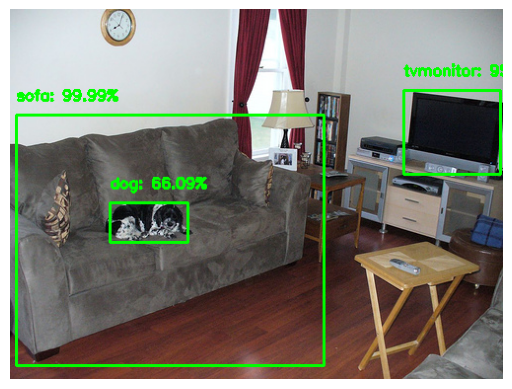

In [260]:
image_path = 'Data/Pascal_VOC/VOC2012_test/VOC2012_test/JPEGImages/2008_000098.jpg'
predict_image(image_path, model)

In [261]:
predict_from_webcam(model=model)